# **3DFeM Project: HZO conductive spots automated experiment**

Jan, 2022

- Work lead by [Sergei V. Kalinin](https://scholar.google.com/citations?hl=en&user=-cuxoSQAAAAJ&view_op=list_works&sortby=pubdate)
- Workflow by [Yongtao Liu](https://scholar.google.com/citations?user=V9FMPgQAAAAJ&hl=en) 
- Hf0.54Zr0.48O2 film by Shelby S. Fields, Takanori Mimura, Jon F. Ihlefeld


In [1]:
!pip install --upgrade imutils

In [2]:
!pip install opencv-python

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
import imutils

In [4]:
!gdown https://drive.google.com/uc?id=1llRkntZB8t1yuQrYbBW2KJ50oRnGBW2v

Downloading...
From: https://drive.google.com/uc?id=1llRkntZB8t1yuQrYbBW2KJ50oRnGBW2v
To: /content/data_HZO_AE.zip
100% 148k/148k [00:00<00:00, 44.9MB/s]


In [5]:
! unzip -q data_HZO_AE.zip

In [6]:
path = "/content/data_HZO_AE/"
os.chdir(path)

In [7]:
#load data
#the current-voltage amplifier is 10e7, so convert the data to nA by multiplying 100
DC6d7 = np.load('BaseImage_DC6d7V_size05V_30.npy')*100

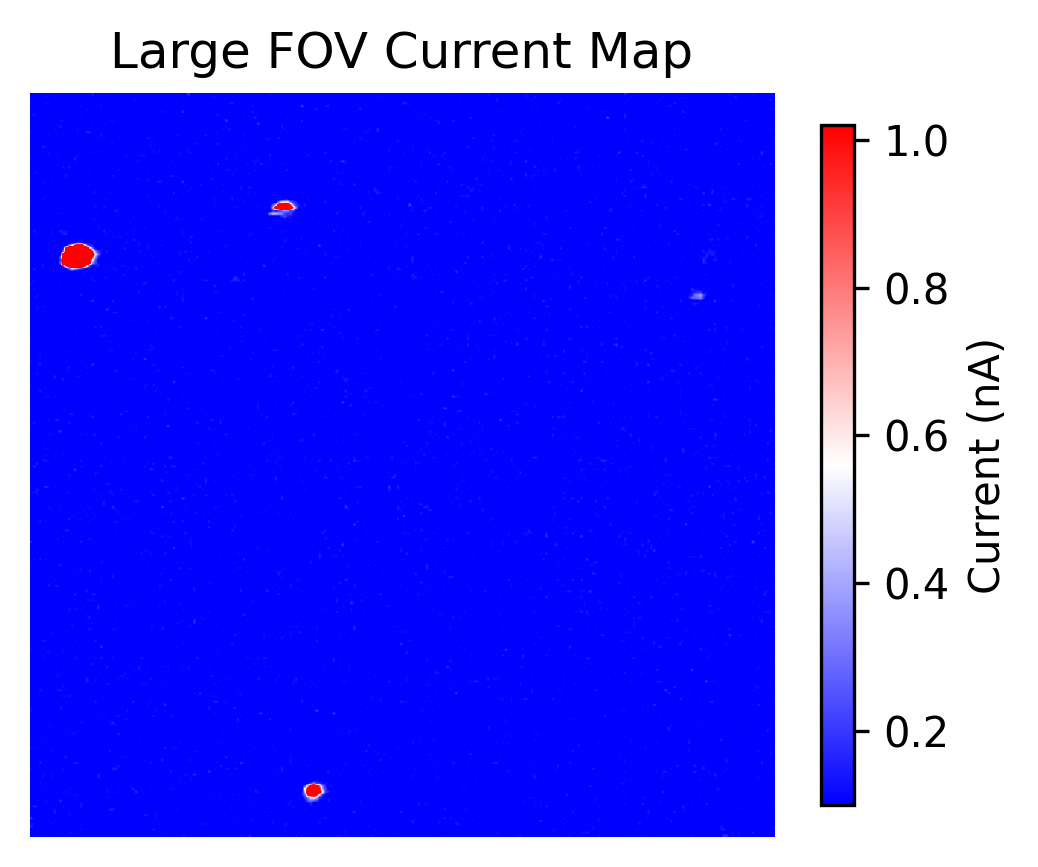

In [8]:
#plot current map
f, ax = plt.subplots(figsize = (4,4), dpi = 300)
plt.imshow(DC6d7, vmin = 0.1, vmax = 1.02, cmap = 'bwr', origin = 'lower')
plt.title("Large FOV Current Map")
plt.axis ("off")
plt.colorbar(shrink = 0.75, label = "Current (nA)")

In [9]:
%%time
#detect hotspots by applying a threshold filter
thresh = np.copy(DC6d7)
th = 0.18
thresh[DC6d7 > th] = 1
thresh[DC6d7 <= th] = 0

# find contours in the thresholded image
thresh = thresh.astype(np.uint8)

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

center = np.zeros((len(cnts), 2))
radius = np.zeros(len(cnts))
for i in range (len(cnts)):
    (x,y),r = cv2.minEnclosingCircle(cnts[i])
    #center location
    center[i,0] = x
    center[i,1] = y
    #radius of minimum circle
    radius[i] = r

#delete small spots as they are most likely measurement noise
ms = 2
center = np.delete(center, np.where(radius < ms), axis = 0)
radius = np.delete(radius, np.where(radius < ms), axis = 0)

CPU times: user 3.16 ms, sys: 0 ns, total: 3.16 ms
Wall time: 42.4 ms


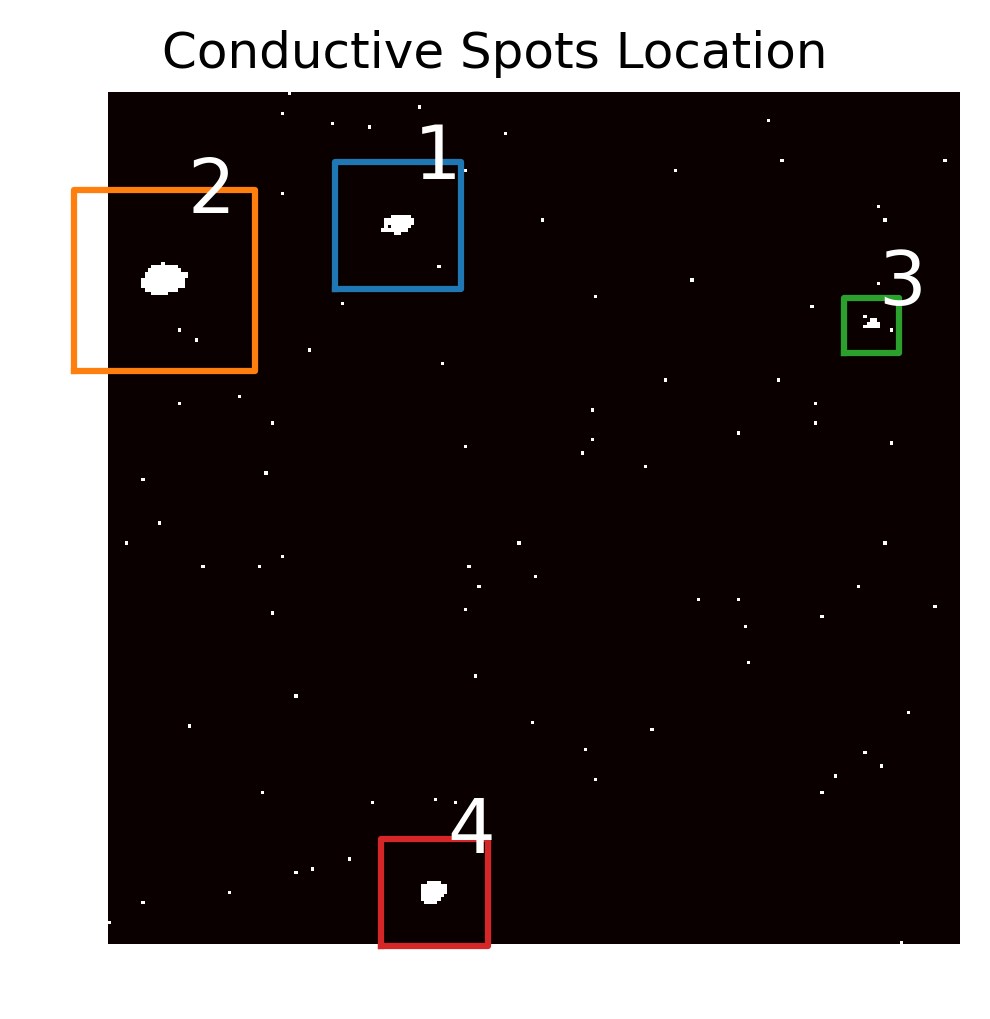

In [10]:
#plot zoom-in measurement areas
boxs = np.zeros((len(radius),2,5))
rad = radius*4

for i in range (len(radius)):
    boxs[i,0,] = center[i,0]-rad[i], center[i,0]-rad[i], center[i,0]+rad[i], center[i,0]+rad[i],center[i,0]-rad[i]
    boxs[i,1,] = center[i,1]-rad[i], center[i,1]+rad[i], center[i,1]+rad[i], center[i,1]-rad[i],center[i,1]-rad[i]

f, ax = plt.subplots(figsize = (4,4), dpi = 300)
plt.imshow(thresh, vmin = 0, vmax = 0.8, cmap = 'hot', origin = 'lower')
plt.title("Conductive Spots Location")
plt.axis ("off")
#plt.colorbar(shrink = 0.75, label = "Current (nA)")

for i in range (len(radius)):
    x = center[i,0]; y = center[i,1]
    r = rad[i]
    plt.plot(boxs[i,0,], boxs[i,1,])
    plt.text(x+r/4, y+3*r/4, str(i+1), c = 'white', fontsize = 18)